## 원본 데이터 데이터세트 만들기

이 장은 처음 (주)injewelme에서 받은 원본데이터를 학습 데이터세트를 구축하는 첫 .ipynb이다.
받은 원본데이터는 
1. 서울 소재초등학교 327명 
2. 제주 소재초등학교 84명
이다.

### 원본 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("..")
path=os.getcwd()

In [3]:
path

'c:\\jupyter\\Explainable Healthcare framework\\Explainable_healthcareframework'

In [4]:
df_seoul=pd.read_excel(path+"\\data\\1.원본 데이터_통합본_서울초.xlsx",sheet_name=None)
df_jeju=pd.read_excel(path+"\\data\\1.원본 데이터_통합본_제주초.xlsx",sheet_name=None)

# 서울초등학교 일때
df=df_seoul

# # 제주초등학교일때
# df=df_seoul

In [5]:
df_user = df['User']
df_body = df['Body']
df_offline = df['오프라인 측정']
# df_mediator = df['중재군 특별미션 정보']
df_stepcount = df['Step Count']
df_exercise = df['Exercise']
df_nutrition= df['Nutrition']
df_sleep= df['Sleep']
# df_rewqrd= df['리워드 데이터']
# df_competition=df['대결 데이터']

# 통합 시트 만들기

### Body 전처리

Height와 Weight 정보를 불러와 동일한 날짜 기준으로 평균값을 정리합니다.
이는 같은 날짜에 서로 다른 시간대에 측정된 데이터가 기록된 경우를 고려하기 위함입니다.

In [6]:
df_body['collect_datetime'] = pd.to_datetime(df_body['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_body = df_body.groupby(['ID', 'collect_datetime']).mean().reset_index()

len(grouped_df_body['ID'].unique())

327

In [7]:
grouped_df_body.shape

(2674, 4)

### Stepcount 전처리

stepcount 동일한 날짜 기준으로 값을 SUM 해서 총합으로 정리합니다.

In [8]:
# 통일된 컬럼명을 위해 아래와 같이 이름을 바꿔준다.
df_stepcount.rename(columns={'date': 'collect_datetime','step_count': 'step count'}, inplace=True)

df_stepcount['collect_datetime'] = pd.to_datetime(df_stepcount['collect_datetime']).dt.strftime('%Y-%m-%d')

grouped_df_stepcount= df_stepcount.groupby(['ID', 'collect_datetime']).sum().reset_index()

### Exercise 전처리

운동량인 burned calory는 오타가 있어기에 burned calorie로 수정하였습니다.
또한 동일날짜내에 여러기록이 있는 경우가 있어 날짜별로 groupby를 수행하였고 sum을 진행하였습니다. 

In [9]:
df_exercise=df_exercise[['ID',"date","burned calory(Kcal)"]]
df_exercise.rename(columns={'date': 'collect_datetime','burned calory(Kcal)': 'burned calorie'}, inplace=True)
df_exercise['collect_datetime'] = pd.to_datetime(df_exercise['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_exercise= df_exercise.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\2006701501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exercise.rename(columns={'date': 'collect_datetime','burned calory(Kcal)': 'burned calorie'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\2006701501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exercise['collect_datetime'] = pd.to_datetime(df_exercise['collect_datetime']).dt.strftime('%Y-%m-%d')


### Nutrition 전처리

칼로리 섭취량도 이름표기 수정  
또한 날짜별 groupby를 해서 칼로리 총합 계산

In [10]:
df_nutrition=df_nutrition[['ID',"date","eat_calory(Kcal)"]]
df_nutrition.rename(columns={'date': 'collect_datetime','eat_calory(Kcal)': 'eat calorie'}, inplace=True)
df_nutrition['collect_datetime'] = pd.to_datetime(df_nutrition['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_nutrition= df_nutrition.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\1437399790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutrition.rename(columns={'date': 'collect_datetime','eat_calory(Kcal)': 'eat calorie'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\1437399790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutrition['collect_datetime'] = pd.to_datetime(df_nutrition['collect_datetime']).dt.strftime('%Y-%m-%d')


### Sleep 전처리

수면시간도 이름표기 수정  
또한 날짜별 groupby를 해서 수면시간 총합 계산

In [11]:
df_sleep=df_sleep[['ID',"date","total_sleep_minute"]]
df_sleep.rename(columns={'date': 'collect_datetime','total_sleep_minute': 'sleep time'}, inplace=True)
df_sleep['collect_datetime'] = pd.to_datetime(df_sleep['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_sleep= df_sleep.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\2146755943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep.rename(columns={'date': 'collect_datetime','total_sleep_minute': 'sleep time'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\2146755943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['collect_datetime'] = pd.to_datetime(df_sleep['collect_datetime']).dt.strftime('%Y-%m-%d')


### 데이터 시트 merge

서울초등학교 실험기간은 2022-07-14~2023-01-11이므로 다음날짜 기간에 해당하는 데이터프레임 만들기  
인원 수 총 327명

In [12]:
# 필터링 기준 날짜 설정
start_date = '2022-07-14'
end_date = '2023-01-11'

In [13]:
len(grouped_df_body['ID'].unique())

327

In [14]:
grouped_df_body

,ID,collect_datetime,height,weight
0,#AAGQKY,2022-07-19,148.000000,45.15
1,#ACGRQP,2022-07-16,136.016667,28.10
2,#ACGRQP,2022-07-23,136.500000,28.20
3,#ACGRQP,2022-07-24,136.700000,29.40
4,#ACGRQP,2022-08-01,136.900000,29.40
...,...,...,...,...
2669,#ZRKRKP,2023-01-04,129.300000,28.80
2670,#ZRKRKP,2023-01-10,129.300000,28.80
2671,#ZWOHRX,2022-07-15,156.700000,47.90
2672,#ZWOHRX,2022-08-07,156.900000,47.50


In [15]:
date_range = pd.date_range(start=start_date, end=end_date)

# 각 ID에 대해 날짜 범위를 반복하여 데이터프레임 생성
data = {
    'ID': np.repeat(grouped_df_body['ID'].unique(),  len(date_range)),
    'collect_datetime': list(date_range) * len(grouped_df_body['ID'].unique())
}

df = pd.DataFrame(data)

In [16]:
# 해당하는 날짜에 각 변수데이터 맵핑: 키, 몸무게, 먹은 칼로리,걸음수,수면시간,태운 칼로리량
grouped_df_body['collect_datetime'] = pd.to_datetime(grouped_df_body['collect_datetime'])
grouped_df_stepcount['collect_datetime'] = pd.to_datetime(grouped_df_stepcount['collect_datetime'])
grouped_df_nutrition['collect_datetime'] = pd.to_datetime(grouped_df_nutrition['collect_datetime'])
grouped_df_exercise['collect_datetime'] = pd.to_datetime(grouped_df_exercise['collect_datetime'])
grouped_df_sleep['collect_datetime'] = pd.to_datetime(grouped_df_sleep['collect_datetime'])

In [17]:
# 전체 하나의 데이터프레임으로 merge
filtered_df = pd.merge(df, grouped_df_body, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_stepcount, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_nutrition, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_exercise, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_sleep, on=['ID', 'collect_datetime'], how='left')

In [18]:
# User 정보 맵핑을 위한 전처리
df_user = df_user.drop(index=0)
# 인덱스를 재설정
df_user = df_user.reset_index(drop=True)
df_user_g=df_user[['ID','gender','grade']]

In [19]:
filtered_df = pd.merge(filtered_df, df_user_g, on='ID', how='left')


In [20]:
filtered_df.isnull().sum()

ID                      0
collect_datetime        0
height              56840
weight              56840
step count          50548
eat calorie         52816
burned calorie      57933
sleep time          52774
gender                546
grade                 546
dtype: int64

In [21]:
filtered_df.shape

(59514, 10)

## 이탈자 제거

휴리스틱한 방법으로 아래 아이디는 이탈자로 기록(Injewelme 측에서 기록되어 고지)되어 제거

In [22]:
ID_name=['#LTLEKW','#ZFKAAY','#HUPKFW','#HTITUK','#QWBXZB']

In [23]:
filtered_df = filtered_df[~filtered_df['ID'].isin(ID_name)]

In [24]:
filtered_df.to_csv(path+'\\data\\2.원본데이터 필터링후 전처리 전_서울초.csv',encoding="cp949",index=False)

## 이상치 전처리_from 급식식단정보

위 데이터세트는 서울초등학교의 급식식단 정보(3.서울초_급식식단정보)를 크롤링한 자료를 사용  
사용이유: 모든 일별 데이터를 사용자가 기록하지 못하기 때문에 한끼만 기록하거나 결측치가 있는 경우가 많다    
따라서 한끼만 기록된 경우는 곱하기 3으로 하고 결측일 경우 본 급식정보를 칼로리에서 곱하기 3으로 하려 한다.  

In [25]:
df_dietboard=pd.read_csv(path+"\\data\\3.서울초_급식식단정보.csv")

In [26]:
df_dietboard.head()

,시도교육청코드,시도교육청명,행정표준코드,학교명,식사코드,식사명,급식일자,급식인원수,요리명,원산지정보,칼로리정보,영양정보,수정일자
0,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240430,863.0,꽃씨잡곡밥 (5)<br/>왜된장국 (5.6)<br/>동태포파슬리튀김 (1.2.5.6...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,599.6 Kcal,탄수화물(g) : 82.2<br/>단백질(g) : 23.9<br/>지방(g) : 1...,20240421
1,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240429,965.0,강황쌀밥 <br/>돈육김치찌개 (5.9.10)<br/>오이부추무침 (13)<br/>...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,577.7 Kcal,탄수화물(g) : 68.0<br/>단백질(g) : 24.9<br/>지방(g) : 2...,20240421
2,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240426,849.0,통밀밥 (6)<br/>북어국 (1.5.6.13)<br/>매운등갈비찜 (5.6.10....,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,554.0 Kcal,탄수화물(g) : 73.5<br/>단백질(g) : 23.7<br/>지방(g) : 1...,20240421
3,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240425,965.0,발효누룽현미밥 <br/>육개장 (5.6.16)<br/>쑥갓두부무침 (5.6)<br/...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,551.6 Kcal,탄수화물(g) : 84.3<br/>단백질(g) : 19.1<br/>지방(g) : 1...,20240421
4,B10,서울특별시교육청,7091458,서울세명초등학교,2,중식,20240424,965.0,콩나물밥 (5.16)<br/>바지락조개탕 (13.18)<br/>반반치킨 (2.5.6...,쇠고기(종류) : 국내산(육우)<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기...,630.9 Kcal,탄수화물(g) : 75.2<br/>단백질(g) : 36.3<br/>지방(g) : 1...,20240421


In [27]:
# 필요한 컬럼정보만 남기고 필터링
filtered_df_new=df_dietboard[['학교명','급식일자','요리명','칼로리정보']]

In [28]:
filtered_df_new['급식일자'] = filtered_df_new['급식일자'].astype(str) # 급식일자 일단 string으로 전환 이상한 오류가 datetime에서 뜸
filtered_df_new['급식일자'] = pd.to_datetime(filtered_df_new['급식일자'], format='%Y%m%d') # 급식일자를 년월일로 바꿈
filtered_df_new['칼로리정보'] = filtered_df_new['칼로리정보'].str.replace(r'Kcal', '', regex=True).astype("float") # 칼로리 정보만 추출하기 위래 정규화를 통해 필터링

C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\3307377459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['급식일자'] = filtered_df_new['급식일자'].astype(str) # 급식일자 일단 string으로 전환 이상한 오류가 datetime에서 뜸
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\3307377459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['급식일자'] = pd.to_datetime(filtered_df_new['급식일자'], format='%Y%m%d') # 급식일자를 년월일로 바꿈
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\3307377459.py:3: SettingWithC

In [29]:
### 급식일자 기준으로 merge

In [30]:
merge_cafeteria_kcal=filtered_df_new[['급식일자', '칼로리정보']]

In [31]:
merged_df = pd.merge(filtered_df, merge_cafeteria_kcal,  left_on='collect_datetime', right_on='급식일자', how='left')
merged_df.to_csv(path+"\\data\\4.서울초_급식정보&최종데이터세트.csv",encoding="cp949",index=False)

## 데이터 전처리

순차적으로 height,weight,eat calorie, step count, sleep time, burned calorie 전처리

In [32]:
sorted_total = merged_df.sort_values(by=['ID', 'collect_datetime']).reset_index(drop=True)

### height, weight 결측치 전처리

In [33]:
from Datapreprocessing.HeighWeight_preprocessing import DataProcessor # 선형보간법으로 채우고 그래도 안

processor = DataProcessor(sorted_total)
sorted_total_processor=processor.get_processed_data()

In [34]:
sorted_total_processor.isnull().sum()

ID                      0
collect_datetime        0
height                  0
weight                  0
step count          16072
eat calorie         21271
burned calorie      46243
sleep time          28678
gender                546
grade                 546
급식일자                26814
칼로리정보                   0
dtype: int64

### 다른 모든 변수 전처리

In [35]:
# 일단 ID 그룹별 step count, sleeptime, burned calorie 중앙값을 대체


import pandas as pd
import numpy as np

# 데이터프레임이 df_result2라고 가정
# ID 그룹별로 중앙값 계산하여 결측치 대체
def fill_missing_with_median_by_id(df):
    # 대체할 컬럼들
    columns_to_fill = ['step count', 'sleep time', 'burned calorie']
    
    # 결과 데이터프레임 복사
    result_df = df.copy()
    
    # ID별로 그룹화하여 각 컬럼의 중앙값으로 결측치 채우기
    for column in columns_to_fill:
        # 각 ID 그룹별 중앙값 계산
        medians = result_df.groupby('ID')[column].transform('median')
        
        # 결측치를 해당 ID의 중앙값으로 대체
        result_df[column] = result_df[column].fillna(medians)
    
    return result_df

# 함수 적용
df_filled = fill_missing_with_median_by_id(sorted_total_processor)



In [36]:
import pandas as pd
import numpy as np

def remove_high_missing_rate_ids(df, threshold=0.9, min_columns=2):
    # 결과 데이터프레임 복사
    result_df = df.copy()
    
    # 확인할 컬럼들
    columns_to_check = ['step count', 'eat calorie', 'burned calorie', 'sleep time']
    
    # ID별 결측치 비율 계산
    missing_ratios = pd.DataFrame()
    
    for column in columns_to_check:
        # ID별로 해당 컬럼의 결측치 비율 계산
        column_missing = result_df.groupby('ID')[column].apply(lambda x: x.isna().mean())
        missing_ratios[column] = column_missing
    
    # 각 ID별로 threshold 이상 결측치를 가진 변수의 개수 계산
    high_missing_counts = (missing_ratios >= threshold).sum(axis=1)
    
    # min_columns 이상의 변수에서 높은 결측치를 가진 ID 식별
    ids_to_drop = high_missing_counts[high_missing_counts >= min_columns].index.tolist()
    
    if ids_to_drop:
        print(f"총 {len(ids_to_drop)}개 ID가 {min_columns}개 이상 변수에서 {threshold*100}% 이상 결측치를 가져 제거됩니다.")
        
        # 해당 ID 제거
        result_df = result_df[~result_df['ID'].isin(ids_to_drop)]
    else:
        print(f"{min_columns}개 이상 변수에서 {threshold*100}% 이상 결측치를 가진 ID가 없습니다.")
    
    # 남은 ID 수 계산
    remaining_ids = result_df['ID'].nunique()
    print(f"남은 ID 수: {remaining_ids}")
    
    return result_df

# 함수 적용 (2개 이상 변수에서 90% 이상 결측)
df_cleaned = remove_high_missing_rate_ids(df_filled, threshold=0.9, min_columns=3)

# 결과 데이터프레임 정보 출력
print(f"원본 데이터프레임 크기: {df_filled.shape}")
print(f"정제된 데이터프레임 크기: {df_cleaned.shape}")

총 81개 ID가 3개 이상 변수에서 90.0% 이상 결측치를 가져 제거됩니다.
남은 ID 수: 246
원본 데이터프레임 크기: (59514, 12)
정제된 데이터프레임 크기: (44772, 12)


In [37]:
# 전체 중앙값으로 결측치 채우기
columns_to_fill = ['step count', 'burned calorie', 'sleep time']
for col in columns_to_fill:
   median_value = df_cleaned[col].median()
   df_cleaned[col] = df_cleaned[col].fillna(median_value)
   print(f"{col}: {median_value:.2f} 값으로 결측치 채움")

step count: 2323.17 값으로 결측치 채움
burned calorie: 41.60 값으로 결측치 채움
sleep time: 462.00 값으로 결측치 채움


### Eat calorie 전처리

모든 데이터가 1회 기록 되었고 3끼 먹었다고 가정하여 확장

In [38]:
df_eat=df_cleaned

In [39]:
df_eat['eat calorie'].describe() # 아래와 같은 사분위값으로 나옴

count    35785.000000
mean      1262.670085
std       1945.948308
min          0.000000
25%        296.666667
50%        556.000000
75%       1289.000000
max      25084.000000
Name: eat calorie, dtype: float64

In [40]:
total_eat=df_eat['eat calorie']
total_eat=total_eat.dropna()
total_eat_np=total_eat.to_numpy()

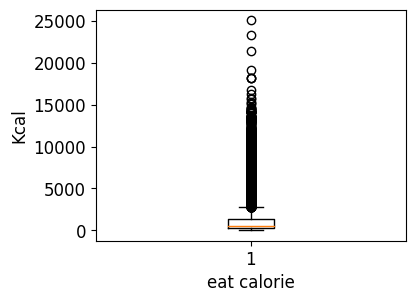

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()

ax.boxplot(total_eat_np)
ax.set_xlabel('eat calorie')
ax.set_ylabel('Kcal')

plt.show()

In [42]:
df_eat.loc[df_eat['eat calorie'] < 100, 'eat calorie'] = np.nan # 100 칼로리는 너무 적으므로 이상치로 널값으로 대체
df_eat.loc[df_eat['eat calorie'] > 4000, 'eat calorie'] = np.nan # 100 칼로리는 너무 적으므로 이상치로 널값으로 대체

df_eat['eat calorie']=df_eat['eat calorie']*3 # 권장 칼로리가 약 2200칼로리인데 대부분 941 칼로리로 대부분 미달인 상태 하루 한끼 내지 두끼만 기록된 것으로 보임
                                              # 따락서

In [43]:
df_eat['eat calorie'].describe() # 그러면 아래와 같은 사분위값이 나오게 된다

count    31627.000000
mean      2520.712978
std       2357.236038
min        300.000000
25%        918.000000
50%       1629.000000
75%       3213.000000
max      11992.714286
Name: eat calorie, dtype: float64

### Eat calorie 결측치 채우기

경우의 수  
1. 널값인데 해당일에 급식 칼로리정보가 있는 경우
2. 널값인데 해당일에 급식 칼로리정보가 없는 경우

### eat calorie는 널값인데 급식 칼로리정보가 있는 경우
급식칼로리 정보*3을 해서 널값을 채운다.

In [44]:
# 조건에 맞는 행을 한 번에 처리 (훨씬 더 효율적)
mask = pd.isna(df_eat["eat calorie"]) & pd.notna(df_eat["칼로리정보"])
df_eat.loc[mask, "eat calorie"] = df_eat.loc[mask, "칼로리정보"] * 1.5 * 3 # 급식에 있는 최소 칼로리 정보 보다 1.5배(많이 먹는다)하고 곱하기 3

### 큰 이상치 선별하기

In [45]:
upper_calorie_threshold=4000 # 60% 이상인 값을 상향 이상치로 설정
grouped = df_eat.groupby('ID')

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# import pandas as pd

# def minmax_scaler(data, min_val=4000):
#     data = np.array(data)
#     max_val = np.max(data)
#     return (data - min_val) / (max_val - min_val)

# def MinMax_eatcalorie(df):
#     # 유효한 데이터를 가진 행만 선택
#     mask = df['eat calorie'].notna()
#     df_eat_calorie = df[mask].reset_index(drop=True)
    
#     # MinMaxScaler 적용 및 결과 병합
#     df_eat_calorie['MinMaxScaler'] = minmax_scaler(df_eat_calorie['eat calorie'])
    
#     # 원본 데이터와 병합
#     result = pd.merge(
#         df, df_eat_calorie, 
#         on=['ID', 'collect_datetime', 'gender', 'grade', 'height', 'weight',
#             'step count', 'burned calorie', 'eat calorie', 'sleep time', 
#             '급식일자', '칼로리정보'],
#         how='left'
#     )
#     return result

# # 메인 처리 부분
# df_total = pd.DataFrame()

# for _, group in grouped:
#     # MinMaxScaler 적용
#     df_MinMax = MinMax_eatcalorie(group)
    
#     # 임계값 초과 데이터 처리 (벡터화된 연산 사용)
#     mask = (df_MinMax["eat calorie"] > upper_calorie_threshold) & (~pd.isna(df_MinMax["eat calorie"]))
#     df_MinMax.loc[mask, "eat calorie"] = upper_calorie_threshold * (1 + df_MinMax.loc[mask, "MinMaxScaler"])
    
#     # 결과 데이터프레임에 추가
#     df_total = pd.concat([df_total, df_MinMax], axis=0)

In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 임계값 설정
upper_calorie_threshold = 4000

def MinMax_eatcalorie(df):
   # 작업할 데이터프레임 복사
   result = df.copy()
   
   # 유효한 eat calorie 데이터 마스크
   mask = result['eat calorie'].notna()
   
   if mask.any():  # 유효한 데이터가 있는 경우만 처리
       # 최대값 계산 (유효한 데이터만 사용)
       valid_eat_calories = result.loc[mask, 'eat calorie']
       max_val = valid_eat_calories.max()
       
       # 임계값 초과 데이터 처리
       over_threshold = (result['eat calorie'] > upper_calorie_threshold) & mask
       if over_threshold.any() and max_val > upper_calorie_threshold:
           # 스케일링 계산 (임시 변수로만 사용)
           scaling_factor = (valid_eat_calories - upper_calorie_threshold) / (max_val - upper_calorie_threshold)
           
           # 임계값 초과 데이터 처리 (원본 eat calorie 컬럼 값 직접 수정)
           result.loc[over_threshold, 'eat calorie'] = upper_calorie_threshold * (1 + scaling_factor.loc[over_threshold])
   
   return result

# 메인 처리 부분
df_total = pd.DataFrame()
for _, group in grouped:
   # MinMaxScaler 적용 및 임계값 처리
   processed_group = MinMax_eatcalorie(group)
   
   # 결과에 추가
   df_total = pd.concat([df_total, processed_group], axis=0)

# 인덱스 리셋
df_total = df_total.reset_index(drop=True)

### 원본 데이터하고 결합

In [48]:
df_total

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#ACGRQP,2022-07-14,136.016667,28.1,219.0,1939.05,41.604375,462.0,2,4,2022-07-14,430.9
1,#ACGRQP,2022-07-15,136.016667,28.1,219.0,1850.40,41.604375,462.0,2,4,2022-07-15,411.2
2,#ACGRQP,2022-07-16,136.016667,28.1,219.0,1922.40,41.604375,462.0,2,4,NaT,427.2
3,#ACGRQP,2022-07-17,136.016667,28.1,219.0,1994.40,41.604375,462.0,2,4,NaT,443.2
4,#ACGRQP,2022-07-18,136.016667,28.1,219.0,2066.40,41.604375,462.0,2,4,2022-07-18,459.2
...,...,...,...,...,...,...,...,...,...,...,...,...
44767,#ZWOHRX,2023-01-07,156.900000,47.5,12985.0,1056.00,33.915000,591.0,2,6,NaT,627.9
44768,#ZWOHRX,2023-01-08,156.900000,47.5,12985.0,1056.00,33.915000,591.0,2,6,NaT,627.9
44769,#ZWOHRX,2023-01-09,156.900000,47.5,12985.0,1056.00,33.915000,591.0,2,6,NaT,627.9
44770,#ZWOHRX,2023-01-10,156.900000,47.5,12985.0,1056.00,33.915000,591.0,2,6,NaT,627.9


## Step Count 전처리

In [49]:
df_total['step count'].describe()

count    4.477200e+04
mean     8.591471e+04
std      1.692729e+06
min      0.000000e+00
25%      4.859274e+02
50%      2.323167e+03
75%      5.241000e+03
max      3.568921e+07
Name: step count, dtype: float64

In [50]:
#10000보 이상 걸음 걸이수에 대해 스무딩

upper_stepcount_threshold=10000
grouped = df_total.groupby('ID')

In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 임계값 설정
upper_stepcount_threshold = 10000

def MinMax_step_count(df):
   # 작업할 데이터프레임 복사
   result = df.copy()
   
   # 유효한 step count 데이터 마스크
   mask = result['step count'].notna()
   
   if mask.any():  # 유효한 데이터가 있는 경우만 처리
       # 최대값 계산 (유효한 데이터만 사용)
       valid_step_counts = result.loc[mask, 'step count']
       max_val = valid_step_counts.max()
       
       # 임계값 초과 데이터 처리
       over_threshold = (result['step count'] > upper_stepcount_threshold) & mask
       if over_threshold.any() and max_val > upper_stepcount_threshold:
           # 스케일링 계산 (임시 변수로만 사용)
           scaling_factor = (valid_step_counts - upper_stepcount_threshold) / (max_val - upper_stepcount_threshold)
           
           # 임계값 초과 데이터 처리 (원본 step count 컬럼 값 직접 수정)
           result.loc[over_threshold, 'step count'] = upper_stepcount_threshold * (1 + scaling_factor.loc[over_threshold])
   
   return result

# 메인 처리 부분
df_total = pd.DataFrame()
for _, group in grouped:
   # MinMaxScaler 적용 및 임계값 처리
   processed_group = MinMax_step_count(group)
   
   # 결과에 추가
   df_total = pd.concat([df_total, processed_group], axis=0)

# 인덱스 리셋
df_total = df_total.reset_index(drop=True)

In [52]:
df_total['step count'].describe()

count    44772.000000
mean      3764.138119
std       4522.001230
min          0.000000
25%        485.927419
50%       2323.166667
75%       5241.000000
max      20000.000000
Name: step count, dtype: float64

## sleep time 전처리

540분(9시간 권장수면시간)을 상향 이상치로 설정

In [53]:
grouped = df_total.groupby('ID')

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 표시 형식 설정
pd.options.display.float_format = '{:.2f}'.format

# 임계값 설정
upper_sleeptime_threshold = 540

def MinMax_sleeptime(df):
    # 작업할 데이터프레임 복사
    result = df.copy()
    
    # 유효한 수면 시간 데이터 마스크
    mask = result['sleep time'].notna()
    
    if mask.any():  # 유효한 데이터가 있는 경우만 처리
        # 최대값 계산 (유효한 데이터만 사용)
        valid_sleep_times = result.loc[mask, 'sleep time']
        max_val = valid_sleep_times.max()
        
        # 임계값 초과 데이터 처리
        over_threshold = (result['sleep time'] > upper_sleeptime_threshold) & mask
        if over_threshold.any() and max_val > upper_sleeptime_threshold:
            # 스케일링 계산 (임시 변수로만 사용)
            scaling_factor = (valid_sleep_times - upper_sleeptime_threshold) / (max_val - upper_sleeptime_threshold)
            
            # 임계값 초과 데이터 처리 (원본 sleep time 컬럼 값 직접 수정)
            result.loc[over_threshold, 'sleep time'] = upper_sleeptime_threshold * (1 + scaling_factor.loc[over_threshold])
    
    return result

# 메인 처리 부분
df_total2 = pd.DataFrame()

for _, group in grouped:
    # ID별로 sleep time이 모두 결측치인 경우 해당 그룹 건너뛰기
    if group['sleep time'].isna().all():
        continue
        
    # 남은 그룹에서 sleep time 결측치를 ID별 중앙값으로 채우기
    group['sleep time'] = group['sleep time'].fillna(group.groupby('ID')['sleep time'].transform('median'))
    
    # MinMaxScaler 적용 및 임계값 처리
    processed_group = MinMax_sleeptime(group)
    
    # 결과에 추가
    df_total2 = pd.concat([df_total2, processed_group], axis=0)

# 인덱스 리셋
df_total2 = df_total2.reset_index(drop=True)

In [55]:
df_total2

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#ACGRQP,2022-07-14,136.02,28.10,219.00,1939.05,41.60,462.00,2,4,2022-07-14,430.90
1,#ACGRQP,2022-07-15,136.02,28.10,219.00,1850.40,41.60,462.00,2,4,2022-07-15,411.20
2,#ACGRQP,2022-07-16,136.02,28.10,219.00,1922.40,41.60,462.00,2,4,NaT,427.20
3,#ACGRQP,2022-07-17,136.02,28.10,219.00,1994.40,41.60,462.00,2,4,NaT,443.20
4,#ACGRQP,2022-07-18,136.02,28.10,219.00,2066.40,41.60,462.00,2,4,2022-07-18,459.20
...,...,...,...,...,...,...,...,...,...,...,...,...
44767,#ZWOHRX,2023-01-07,156.90,47.50,20000.00,1056.00,33.91,1080.00,2,6,NaT,627.90
44768,#ZWOHRX,2023-01-08,156.90,47.50,20000.00,1056.00,33.91,1080.00,2,6,NaT,627.90
44769,#ZWOHRX,2023-01-09,156.90,47.50,20000.00,1056.00,33.91,1080.00,2,6,NaT,627.90
44770,#ZWOHRX,2023-01-10,156.90,47.50,20000.00,1056.00,33.91,1080.00,2,6,NaT,627.90


In [56]:
len(df_total2['ID'].unique())

246

### 수면시간 너무 많이 나오거나 너무 적게 나오는 값 결측치로 변환

In [57]:
# 수면 시간 720(12시간 이상)이상 널값으로 교체
def replace_above_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: np.nan if x > threshold else x)
    return df

# 수면 시간 720(12시간 이상)이상 널값으로 교체
df_result3 = replace_above_threshold_with_null(df_total2, 'sleep time', 720)

In [58]:
#160(2시간 40분 이하) 널값으로 교체
def replace_under_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: 160 if x < threshold else x)
    return df

#160분(2시간 40분 이하) 널값으로 교체
df_result3 = replace_under_threshold_with_null(df_total2, 'sleep time', 160)

In [59]:
# ID별 sleep time 중앙값 계산
sleep_median = df_result3.groupby('ID')['sleep time'].transform('median')

# 결측치를 ID별 중앙값으로 채우기
df_result3['sleep time'] = df_result3['sleep time'].fillna(sleep_median)

In [60]:
# 여전히 결측치가 있는 ID 찾기
still_missing = df_result3[df_result3['sleep time'].isna()]['ID'].unique()

# 해당 ID 모두 삭제
if len(still_missing) > 0:
    print(f"{len(still_missing)}개 ID에서 여전히 sleep time 결측치가 있어 삭제합니다.")
    df_result3 = df_result3[~df_result3['ID'].isin(still_missing)]

3개 ID에서 여전히 sleep time 결측치가 있어 삭제합니다.


##  burned calorie 전처리

축구 2시간 기준 칼로리 소모량 1700 kcal를 상향 이상치로 설정

In [61]:
df_result3['burned calorie'].describe()
grouped = df_result3.groupby('ID')

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 표시 형식 설정
pd.options.display.float_format = '{:.2f}'.format

# 임계값 설정
upper_burn_threshold = 1700

def MinMax_burned_calorie(df):
   # 작업할 데이터프레임 복사
   result = df.copy()
   
   # 유효한 burned calorie 데이터 마스크
   mask = result['burned calorie'].notna()
   
   if mask.any():  # 유효한 데이터가 있는 경우만 처리
       # 최대값 계산 (유효한 데이터만 사용)
       valid_burned_calories = result.loc[mask, 'burned calorie']
       max_val = valid_burned_calories.max()
       
       # 임계값 초과 데이터 처리
       over_threshold = (result['burned calorie'] > upper_burn_threshold) & mask
       if over_threshold.any() and max_val > upper_burn_threshold:
           # 스케일링 계산 (임시 변수로만 사용)
           scaling_factor = (valid_burned_calories - upper_burn_threshold) / (max_val - upper_burn_threshold)
           
           # 임계값 초과 데이터 처리 (원본 burned calorie 컬럼 값 직접 수정)
           result.loc[over_threshold, 'burned calorie'] = upper_burn_threshold * (1 + scaling_factor.loc[over_threshold])
   
   return result

# 메인 처리 부분
df_total3 = pd.DataFrame()
for _, group in grouped:
   # MinMaxScaler 적용 및 임계값 처리
   processed_group = MinMax_burned_calorie(group)
   
   # 결과에 추가
   df_total3 = pd.concat([df_total3, processed_group], axis=0)

# 인덱스 리셋
df_total3 = df_total3.reset_index(drop=True)

In [64]:
df_total3

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#ACGRQP,2022-07-14,136.02,28.10,219.00,1939.05,41.60,462.00,2,4,2022-07-14,430.90
1,#ACGRQP,2022-07-15,136.02,28.10,219.00,1850.40,41.60,462.00,2,4,2022-07-15,411.20
2,#ACGRQP,2022-07-16,136.02,28.10,219.00,1922.40,41.60,462.00,2,4,NaT,427.20
3,#ACGRQP,2022-07-17,136.02,28.10,219.00,1994.40,41.60,462.00,2,4,NaT,443.20
4,#ACGRQP,2022-07-18,136.02,28.10,219.00,2066.40,41.60,462.00,2,4,2022-07-18,459.20
...,...,...,...,...,...,...,...,...,...,...,...,...
44221,#ZWOHRX,2023-01-07,156.90,47.50,20000.00,1056.00,33.91,459.60,2,6,NaT,627.90
44222,#ZWOHRX,2023-01-08,156.90,47.50,20000.00,1056.00,33.91,459.60,2,6,NaT,627.90
44223,#ZWOHRX,2023-01-09,156.90,47.50,20000.00,1056.00,33.91,459.60,2,6,NaT,627.90
44224,#ZWOHRX,2023-01-10,156.90,47.50,20000.00,1056.00,33.91,459.60,2,6,NaT,627.90


## 최종데이터세트 정리

In [65]:
df_final=df_total3[['ID','collect_datetime','gender','grade','height','weight','step count','burned calorie','eat calorie','sleep time']]

In [66]:
df_final.head()

,ID,collect_datetime,gender,grade,height,weight,step count,burned calorie,eat calorie,sleep time
0,#ACGRQP,2022-07-14,2,4,136.02,28.10,219.00,41.60,1939.05,462.00
1,#ACGRQP,2022-07-15,2,4,136.02,28.10,219.00,41.60,1850.40,462.00
2,#ACGRQP,2022-07-16,2,4,136.02,28.10,219.00,41.60,1922.40,462.00
3,#ACGRQP,2022-07-17,2,4,136.02,28.10,219.00,41.60,1994.40,462.00
4,#ACGRQP,2022-07-18,2,4,136.02,28.10,219.00,41.60,2066.40,462.00


In [67]:
df_final.isnull().sum()

# ID별 sleep time 중앙값 계산
gender = df_final.groupby('ID')['gender'].transform('median')
grade = df_final.groupby('ID')['grade'].transform('median')


# 결측치를 ID별 중앙값으로 채우기
df_final['gender'] = df_final['gender'].fillna(gender)
df_final['grade'] = df_final['grade'].fillna(grade)

c:\Users\jaemin\anaconda3\envs\jm_main\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\jaemin\anaconda3\envs\jm_main\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\2103783608.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['gender'] = df_final['gender'].fillna(gender)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_31324\2103783608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [68]:
df_final.isnull().sum()

ID                    0
collect_datetime      0
gender              182
grade               182
height                0
weight                0
step count            0
burned calorie        0
eat calorie           0
sleep time            0
dtype: int64

In [69]:
df_final=df_final.dropna().reset_index(drop=True)

In [70]:
df_final.to_csv(path+'\\data\\5.서울초_df_final.csv',encoding='cp949',index=False)

In [71]:
df_final[df_final['ID']=='#ACGRQP']['weight'].describe()

count   182.00
mean     32.09
std       8.67
min      28.10
25%      29.80
50%      30.00
75%      30.00
max      66.97
Name: weight, dtype: float64

In [83]:
df_new=filtered_df[filtered_df['ID'].isin(df_final['ID'].unique())].reset_index(drop=True)

In [79]:
filtered_df[filtered_df['ID'].isin(df_final['ID'].unique())].isnull().sum()/len(filtered_df)

ID                 0.00
collect_datetime   0.00
height             0.70
weight             0.70
step count         0.59
eat calorie        0.63
burned calorie     0.71
sleep time         0.63
gender             0.00
grade              0.00
dtype: float64

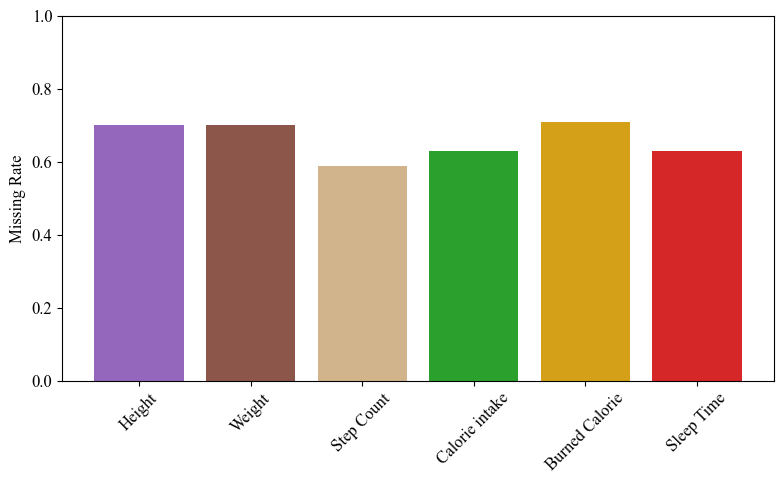

In [93]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = ['Height', 'Weight', 'Step Count', 'Calorie intake', 'Burned Calorie', 'Sleep Time']
values = [0.70, 0.70, 0.59, 0.63, 0.71, 0.63]
colors = ['#9467bd', '#8c564b', '#d2b48c', '#2ca02c', '#d4a017', '#d62728']  # 이미지에 맞춘 색상

# 막대 그래프 수정
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=colors)
plt.ylim(0, 1)
plt.ylabel('Missing Rate', fontname='Times New Roman', fontsize=12)
plt.xticks(fontname='Times New Roman', fontsize=12, rotation=45)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.tight_layout()
plt.show()


In [87]:
df_new['ID']

0        #ACGRQP
1        #ACGRQP
2        #ACGRQP
3        #ACGRQP
4        #ACGRQP
          ...   
44039    #ZWOHRX
44040    #ZWOHRX
44041    #ZWOHRX
44042    #ZWOHRX
44043    #ZWOHRX
Name: ID, Length: 44044, dtype: object

In [ ]:
df_final